In [34]:
import numpy as np
from data_preprocess import *
from utils import *

In [35]:
%load_ext autoreload
%autoreload 2

data_dict = load_data()
X_test = data_dict['X_test']
y_test = data_dict['y_test']
X_train_valid = data_dict['X_train_valid']
y_train_valid = data_dict['y_train_valid']
person_train_valid = data_dict['person_train_valid']
person_test = data_dict['person_test']

print('Shape of X_train_valid set:',X_train_valid.shape)
print('Shape of y_train_valid labels:',y_train_valid.shape)
print('Shape of X_test set:',X_test.shape)
print('Shape of y_test labels:',y_test.shape)
print('Shape of person_train_valid set:',person_train_valid.shape)
print('Shape of person_test labels:',person_test.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape of X_train_valid set: (2115, 22, 1000)
Shape of y_train_valid labels: (2115,)
Shape of X_test set: (443, 22, 1000)
Shape of y_test labels: (443,)
Shape of person_train_valid set: (2115, 1)
Shape of person_test labels: (443, 1)


## Split train data into each class for analysis

In [36]:
# y_train_convert = y_train_valid - 769
# data_class = {}
# for data, label in zip(X_train_valid, y_train_convert):
#     if data_class.get(label) is None:
#         data_class[label] = np.array([data])
#     else:
#         data_class[label] = np.append(data_class[label], [data], axis=0)

In [37]:
# plot_channel_perclass(data_class, [2, 9]) # you can try other channels, pretty much all channels are the same

In [38]:
# aug_data = load_prep_data(time=500, debug=True, onehot=True)
# save_path = get_save_path()
# ensure_dir(save_path)
# save_data_pickle(aug_data, save_path)

In [39]:
# for subject_index in range(9):
#     data_subject = get_subject_by_index(data_dict, subject_index)
#     X_train_valid = data_subject['X_train_valid']
#     y_train_valid = data_subject['y_train_valid']
#     X_test = data_subject['X_test']
#     y_test = data_subject['y_test']
    
#     print('subject idx {}, X_train_valid.shape {} y_train_valid.shape {} X_test.shape {} y_test.shape {}'.format(subject_index, X_train_valid.shape, y_train_valid.shape, X_test.shape, y_test.shape))

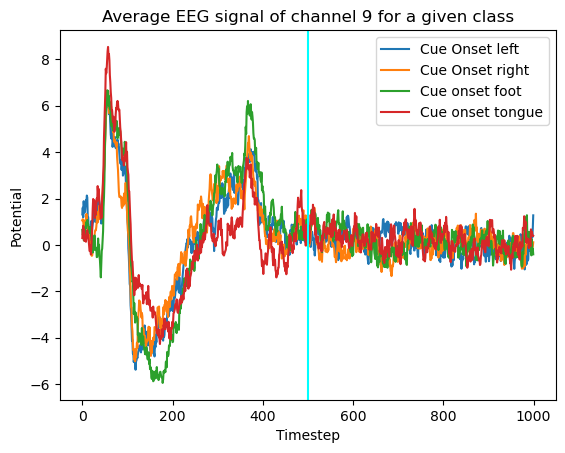

In [40]:
data_dict = load_data()
X_test = data_dict['X_test']
y_test = data_dict['y_test']
X_train_valid = data_dict['X_train_valid']
y_train_valid = data_dict['y_train_valid']
person_train_valid = data_dict['person_train_valid']
person_test = data_dict['person_test']

y_train_valid -= 769
y_test -= 769

# X_train_valid -= np.expand_dims(np.mean(X_train_valid, axis=-1), -1)
# X_test -= np.expand_dims(np.mean(X_test, axis=-1), -1)
# X_train_valid /= np.expand_dims(np.std(X_train_valid, axis=-1), -1)
# X_test /= np.expand_dims(np.std(X_test, axis=-1), -1)

import matplotlib.pyplot as plt
## Visualizing the data

ch_data = X_train_valid[:,8,:]


class_0_ind = np.where(y_train_valid == 0)
ch_data_class_0 = ch_data[class_0_ind]
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.xlabel('Timestep')  # Add x-axis label
plt.ylabel('Potential')  # Add y-axis label
plt.title('Average EEG signal of channel 9 for a given class')  # Add plot title


plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])